<a href="https://colab.research.google.com/github/rajkumar2698/Nutrition_Paradox/blob/main/Nutrition__Paradox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

urls = {
   "adult_obesity": "https://ghoapi.azureedge.net/api/NCD_BMI_30C",
   "child_obesity": "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C",
   "adult_malnutrition": "https://ghoapi.azureedge.net/api/NCD_BMI_18C",
   "child_malnutrition": "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
}

def fetch_data(url):
  response = requests.get(url)
  data = response.json()['value']
  return pd.DataFrame(data)

df_adult_obesity = fetch_data(urls["adult_obesity"])
df_child_obesity = fetch_data(urls["child_obesity"])
df_adult_malnutrition = fetch_data(urls["adult_malnutrition"])
df_child_malnutrition = fetch_data(urls["child_malnutrition"])
print("Data successfully loaded!")

Data successfully loaded!


In [ ]:

df_adult_obesity["age_group"] = "Adult"
df_child_obesity["age_group"] = "Child/Adolescent"
df_adult_malnutrition["age_group"] = "Adult"
df_child_malnutrition["age_group"] = "Child/Adolescent"

df_obesity = pd.concat([df_adult_obesity, df_child_obesity], ignore_index=True)
df_malnutrition = pd.concat([df_adult_malnutrition, df_child_malnutrition], ignore_index=True)


In [ ]:
df_obesity = df_obesity[df_obesity["TimeDim"].between(2012, 2022)]
df_malnutrition = df_malnutrition[df_malnutrition["TimeDim"].between(2012, 2022)]


In [ ]:
cols = ["ParentLocation","Dim1","TimeDim","Low","High","NumericValue","SpatialDim","age_group"]

def clean_df(df):
    df = df[cols].copy()
    df.rename(columns={
        "TimeDim":"Year",
        "Dim1":"Gender",
        "NumericValue":"Mean_Estimate",
        "Low":"LowerBound",
        "High":"UpperBound",
        "ParentLocation":"Region",
        "SpatialDim":"Country"
    }, inplace=True)
    return df

df_obesity = clean_df(df_obesity)
df_malnutrition = clean_df(df_malnutrition)


In [ ]:
gender_map = {
    "SEX_MLE": "Male",
    "SEX_FMLE": "Female",
    "SEX_BTSX": "Both"
}

df_obesity["Gender"] = df_obesity["Gender"].map(gender_map)
df_malnutrition["Gender"] = df_malnutrition["Gender"].map(gender_map)


In [ ]:
%pip install pycountry

In [ ]:
import pycountry

def convert_country(code):
    try:
        country = pycountry.countries.get(alpha_3=code)
        return country.name if country else code
    except:
        return code


In [ ]:
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}


In [ ]:
#Special Case Convertion
df_obesity["Country"] = df_obesity["Country"].apply(convert_country)
df_malnutrition["Country"] = df_malnutrition["Country"].apply(convert_country)

df_obesity["Country"] = df_obesity["Country"].replace(special_cases)
df_malnutrition["Country"] = df_malnutrition["Country"].replace(special_cases)


In [ ]:
df_obesity["CI_Width"] = df_obesity["UpperBound"] - df_obesity["LowerBound"]
df_malnutrition["CI_Width"] = df_malnutrition["UpperBound"] - df_malnutrition["LowerBound"]


In [ ]:
def categorize_obesity(val):
    if val >= 30:
        return "High"
    elif val >= 25:
        return "Moderate"
    else:
        return "Low"


def categorize_malnutrition(val):
    if val >= 20:
        return "High"
    elif val >= 10:
        return "Moderate"
    else:
        return "Low"


df_obesity["Obesity_Level"] = df_obesity["Mean_Estimate"].apply(categorize_obesity)
df_malnutrition["Malnutrition_Level"] = df_malnutrition["Mean_Estimate"].apply(categorize_malnutrition)


In [ ]:
df_obesity = df_obesity[
    [
        "Year",
        "Gender",
        "Mean_Estimate",
        "LowerBound",
        "UpperBound",
        "age_group",
        "Country",
        "Region",
        "CI_Width",
        "Obesity_Level"
    ]
]


df_malnutrition = df_malnutrition[
    [
        "Year",
        "Gender",
        "Mean_Estimate",
        "LowerBound",
        "UpperBound",
        "age_group",
        "Country",
        "Region",
        "CI_Width",
        "Malnutrition_Level"
    ]
]



print(df_obesity.head())
print(df_malnutrition.head())

   Year  Gender  Mean_Estimate  LowerBound  UpperBound age_group  \
0  2020    Both       7.587976    7.045677    8.160195     Adult   
2  2021  Female      16.798417   14.229935   19.655068     Adult   
3  2014    Male      19.599763   16.816987   22.484732     Adult   
5  2019    Male      20.532216   17.483680   23.878790     Adult   
7  2022    Both       4.935368    4.128999    5.799731     Adult   

                  Country           Region  CI_Width Obesity_Level  
0  Western Pacific Region             None  1.114518           Low  
2                Slovenia           Europe  5.425133           Low  
3    Moldova, Republic of           Europe  5.667745           Low  
5                 Belgium           Europe  6.395110           Low  
7                   Japan  Western Pacific  1.670732           Low  
    Year  Gender  Mean_Estimate  LowerBound  UpperBound age_group  \
0   2018    Both       3.942757    2.910176    5.165938     Adult   
2   2018  Female       1.577565    0.80

In [ ]:
# Shape
print("Obesity shape:", df_obesity.shape)
print("Malnutrition shape:", df_malnutrition.shape)

# Structure
df_obesity.info()
df_malnutrition.info()

# Preview
df_obesity.head()
df_malnutrition.head()


Obesity shape: (27720, 10)
Malnutrition shape: (27720, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 0 to 83154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           27720 non-null  int64  
 1   Gender         27720 non-null  object 
 2   Mean_Estimate  27720 non-null  float64
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   age_group      27720 non-null  object 
 6   Country        27720 non-null  object 
 7   Region         26268 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   Obesity_Level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 0 to 83159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                27720 non-null  int6

,Year,Gender,Mean_Estimate,LowerBound,UpperBound,age_group,Country,Region,CI_Width,Malnutrition_Level
0,2018,Both,3.942757,2.910176,5.165938,Adult,Saint Lucia,Americas,2.255761,Low
2,2018,Female,1.577565,0.801491,2.616453,Adult,Palau,Western Pacific,1.814962,Low
6,2016,Female,1.995392,1.432766,2.682612,Adult,Albania,Europe,1.249847,Low
9,2017,Male,1.618768,1.009803,2.385908,Adult,Russian Federation,Europe,1.376106,Low
11,2016,Both,6.446506,5.336079,7.676466,Adult,Liberia,Africa,2.340387,Low


In [ ]:
# Missing values
df_obesity.isna().sum()
df_malnutrition.isna().sum()



,0
Year,0
Gender,0
Mean_Estimate,0
LowerBound,0
UpperBound,0
age_group,0
Country,0
Region,1452
CI_Width,0
Malnutrition_Level,0


In [ ]:
#Unknown
df_obesity["Region"] = df_obesity["Region"].fillna("Unknown")
df_malnutrition["Region"] = df_malnutrition["Region"].fillna("Unknown")


In [ ]:

# Basic statistics
df_obesity.describe()
df_malnutrition.describe()


,Year,Mean_Estimate,LowerBound,UpperBound,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,5.354451,3.397094,8.147889,4.750795
std,3.162335,4.811220,3.908061,6.443692,4.257683
min,2012.000000,0.175309,0.023703,0.354833,0.166679
25%,2014.000000,2.039278,1.053666,3.143307,1.603222
50%,2017.000000,3.597794,1.907971,6.095557,3.351093
75%,2020.000000,7.335245,4.186440,11.526301,6.530869
max,2022.000000,35.894114,31.365401,43.680286,26.701744


In [ ]:
df_obesity["Obesity_Level"].value_counts()
df_malnutrition["Malnutrition_Level"].value_counts()


,count
Malnutrition_Level,
Low,23647
Moderate,3571
High,502


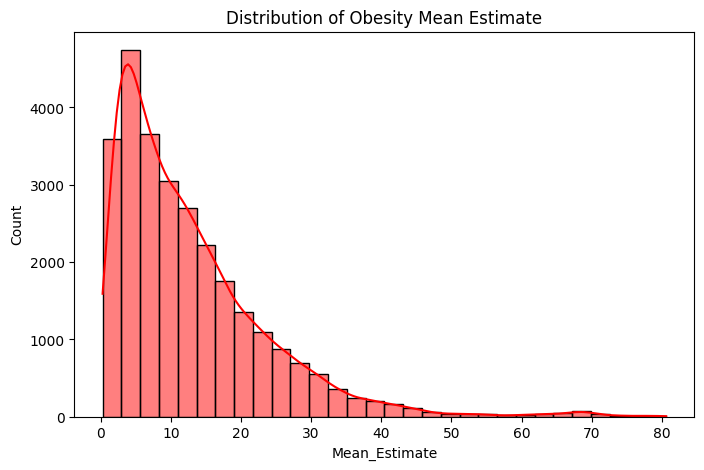

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_obesity["Mean_Estimate"], bins=30, kde=True, color ="red")
plt.title("Distribution of Obesity Mean Estimate")
plt.show()

#Obesity → right-skewed (few countries with very high obesity)

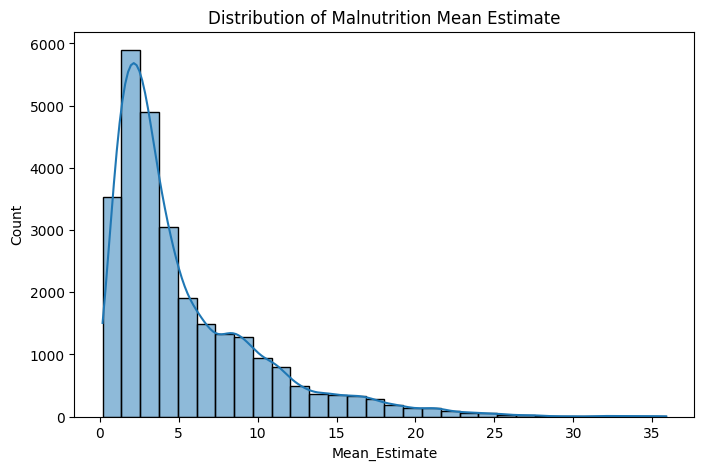

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_malnutrition["Mean_Estimate"], bins=30, kde=True)
plt.title("Distribution of Malnutrition Mean Estimate")
plt.show()

#Malnutrition → concentrated at lower values

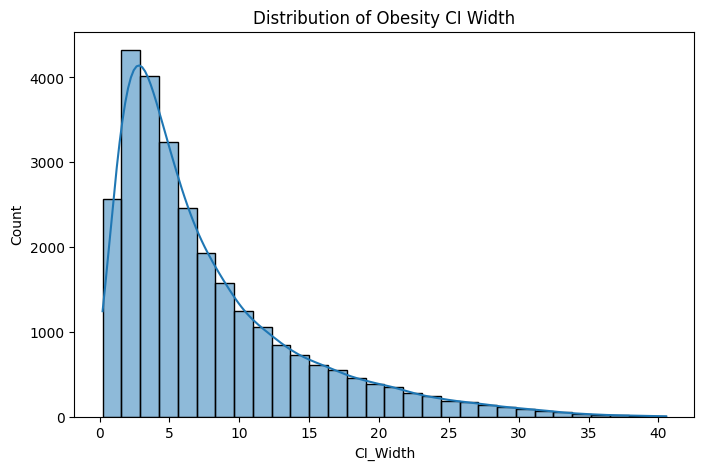

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_obesity["CI_Width"], bins=30, kde=True)
plt.title("Distribution of Obesity CI Width")
plt.show()
#Wider CI = more uncertainty
#Narrow CI = more reliable estimate

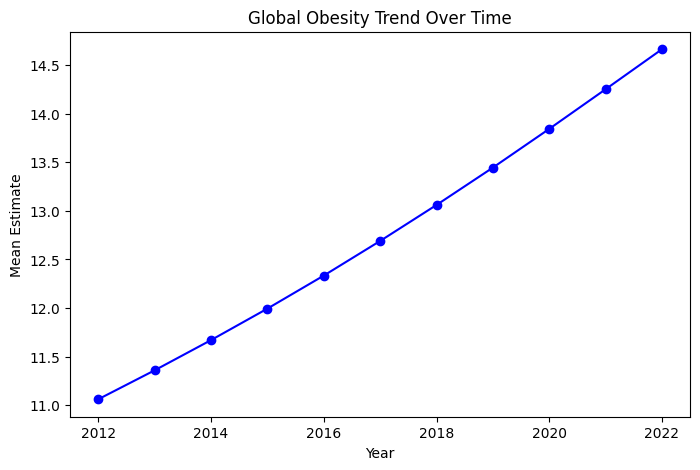

In [ ]:
obesity_year = df_obesity.groupby("Year")["Mean_Estimate"].mean()

plt.figure(figsize=(8,5))
plt.plot(obesity_year.index, obesity_year.values, marker="o",color ="blue")
plt.title("Global Obesity Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Estimate")
plt.show()
#Obesity shows a gradual increase over years

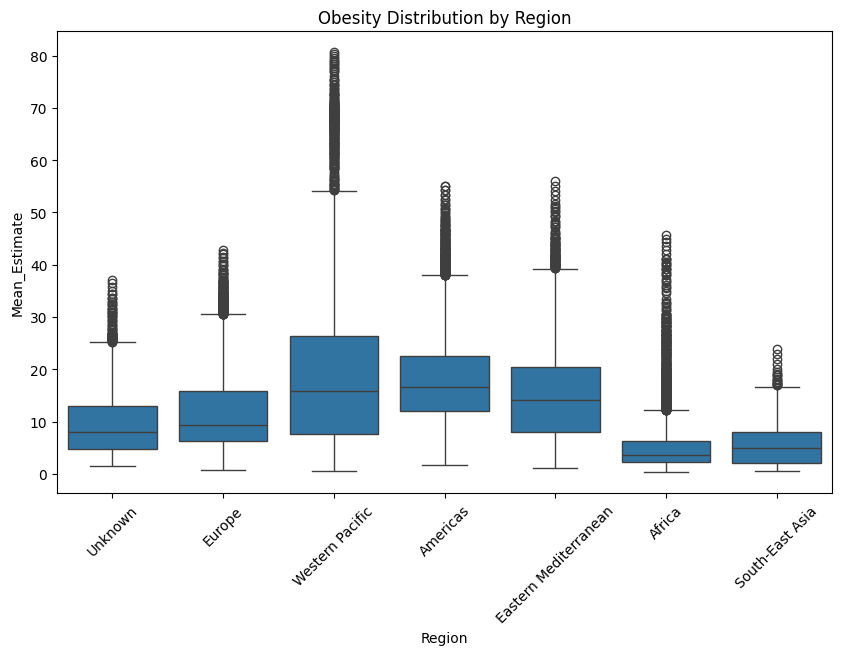

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Region", y="Mean_Estimate", data=df_obesity)
plt.xticks(rotation=45)
plt.title("Obesity Distribution by Region")
plt.show()
#Median differences
#Regional variability
#Outliers

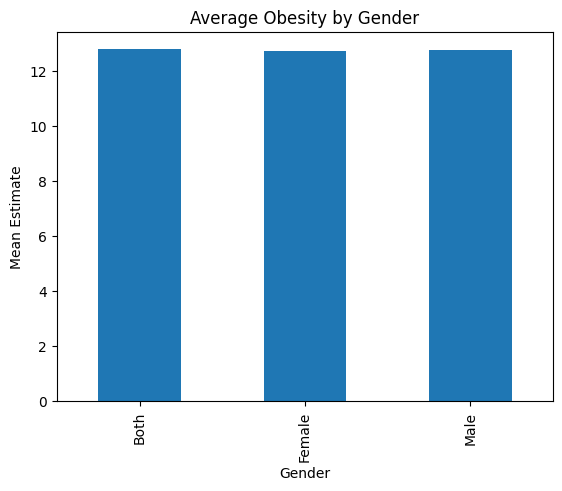

In [ ]:
gender_mean = df_obesity.groupby("Gender")["Mean_Estimate"].mean()

gender_mean.plot(kind="bar", title="Average Obesity by Gender")
plt.ylabel("Mean Estimate")
plt.show()
#Useful demographic insight

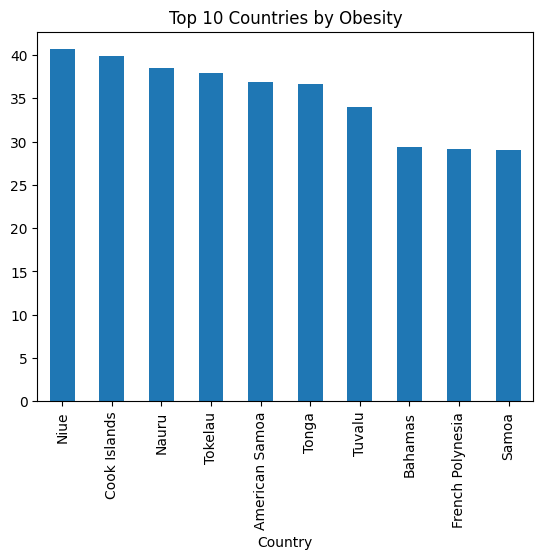

In [ ]:
top10 = (
    df_obesity.groupby("Country")["Mean_Estimate"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top10.plot(kind="bar", title="Top 10 Countries by Obesity")
plt.show()


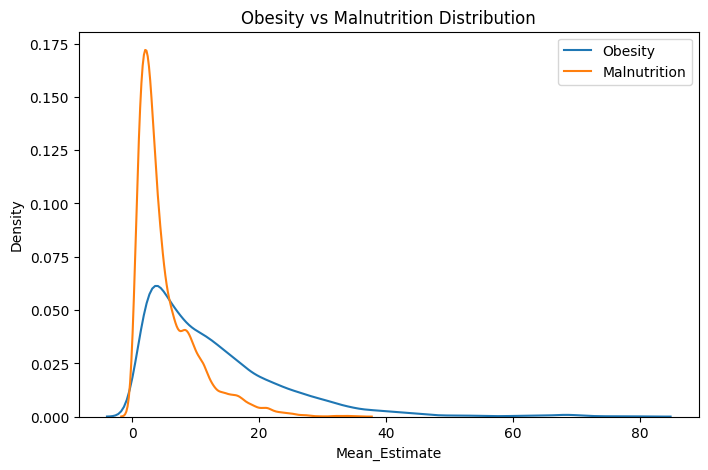

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_obesity["Mean_Estimate"], label="Obesity")
sns.kdeplot(df_malnutrition["Mean_Estimate"], label="Malnutrition")
plt.legend()
plt.title("Obesity vs Malnutrition Distribution")
plt.show()
#Clear contrast between the two health indicators

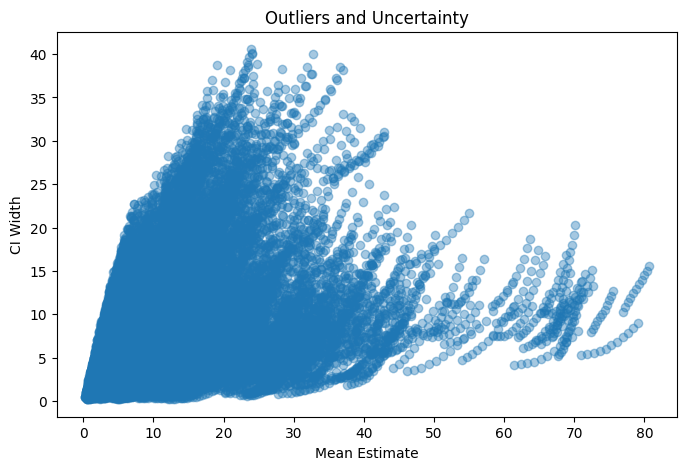

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df_obesity["Mean_Estimate"], df_obesity["CI_Width"], alpha=0.4)
plt.xlabel("Mean Estimate")
plt.ylabel("CI Width")
plt.title("Outliers and Uncertainty")
plt.show()
#High Mean + High CI → unreliable extreme cases

In [ ]:
!pip install pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
import mysql.connector
import sqlalchemy

In [ ]:

DATABASE_URL = (
    "mysql+pymysql://2PpJDCf8pRjqz7P.root:xWoSRxokaC3mm9Uv"
    "@gateway01.ap-southeast-1.prod.aws.tidbcloud.com:4000/harvards_artifact_collections"
    "?ssl_ca=/etc/ssl/certs/ca-certificates.crt"
    "&ssl_verify_cert=true"
    "&ssl_verify_identity=true"
)

from sqlalchemy import create_engine
engine = create_engine(
    DATABASE_URL,
    pool_pre_ping=True,   # Test connections before use
    echo=False    # Disable detailed SQL logging
)

conn = engine.connect()

In [ ]:
from sqlalchemy import text
import pandas as pd

with engine.connect() as conn:
    conn.execute(text("DROP TABLE IF EXISTS obesity_data"))
    conn.execute(text("DROP TABLE IF EXISTS malnutrition_data"))
    conn.commit()

In [ ]:
df_obesity.to_sql(
    name="obesity_data",
    con=engine,
    if_exists="replace",   # creates table automatically
    index=False,
    method="multi",        # faster batch insert
    chunksize=1000
)

27720

In [ ]:
df_malnutrition.to_sql(
    name="malnutrition_data",
    con=engine,
    if_exists="replace",
    index=False,
    method="multi",
    chunksize=1000
)

27720

In [ ]:
# Read tables from SQL
df_obesity_sql = pd.read_sql("SELECT * FROM obesity_data", engine)
df_malnutrition_sql = pd.read_sql("SELECT * FROM malnutrition_data", engine)

# Verify
df_obesity_sql.head()


,Year,Gender,Mean_Estimate,LowerBound,UpperBound,age_group,Country,Region,CI_Width,Obesity_Level
0,2020,Both,7.587976,7.045677,8.160195,Adult,Western Pacific Region,Unknown,1.114518,Low
1,2021,Female,16.798417,14.229935,19.655068,Adult,Slovenia,Europe,5.425133,Low
2,2014,Male,19.599763,16.816987,22.484732,Adult,"Moldova, Republic of",Europe,5.667745,Low
3,2019,Male,20.532216,17.483680,23.878790,Adult,Belgium,Europe,6.395110,Low
4,2022,Both,4.935368,4.128999,5.799731,Adult,Japan,Western Pacific,1.670732,Low


In [ ]:
df_malnutrition_sql.head()

,Year,Gender,Mean_Estimate,LowerBound,UpperBound,age_group,Country,Region,CI_Width,Malnutrition_Level
0,2018,Both,3.942757,2.910176,5.165938,Adult,Saint Lucia,Americas,2.255761,Low
1,2018,Female,1.577565,0.801491,2.616453,Adult,Palau,Western Pacific,1.814962,Low
2,2016,Female,1.995392,1.432766,2.682612,Adult,Albania,Europe,1.249847,Low
3,2017,Male,1.618768,1.009803,2.385908,Adult,Russian Federation,Europe,1.376106,Low
4,2016,Both,6.446506,5.336079,7.676466,Adult,Liberia,Africa,2.340387,Low


In [ ]:

#OBESITY TABLE – 10 SQL QUERIES

#Top 5 regions with highest average obesity (2022)
SELECT region, AVG(mean_estimate) AS avg_obesity
FROM obesity_table
WHERE year = 2022
GROUP BY region
ORDER BY avg_obesity DESC
LIMIT 5;

#Top 5 countries with highest obesity estimates
SELECT country, AVG(mean_estimate) AS avg_obesity
FROM obesity_table
GROUP BY country
ORDER BY avg_obesity DESC
LIMIT 5;

#Obesity trend in India over the years
SELECT year, AVG(mean_estimate) AS avg_obesity
FROM obesity_table
WHERE country = 'India'
GROUP BY year
ORDER BY year;

#Average obesity by gender
SELECT gender, AVG(mean_estimate) AS avg_obesity
FROM obesity_table
GROUP BY gender;

#Country count by obesity level category & age group
SELECT
  age_group,
  CASE
    WHEN mean_estimate < 10 THEN 'Low'
    WHEN mean_estimate BETWEEN 10 AND 20 THEN 'Medium'
    ELSE 'High'
  END AS obesity_level,
  COUNT(DISTINCT country) AS country_count
FROM obesity_table
GROUP BY age_group, obesity_level;

#Least reliable vs most consistent countries (CI Width)
SELECT country, AVG(ci_width) AS avg_ci_width
FROM obesity_table
GROUP BY country
ORDER BY avg_ci_width DESC
LIMIT 5;

SELECT country, AVG(ci_width) AS avg_ci_width
FROM obesity_table
GROUP BY country
ORDER BY avg_ci_width ASC
LIMIT 5;

#Average obesity by age group
SELECT age_group, AVG(mean_estimate) AS avg_obesity
FROM obesity_table
GROUP BY age_group;

#Top 10 countries with consistent low obesity (low mean + low CI)
SELECT country,
       AVG(mean_estimate) AS avg_obesity,
       AVG(ci_width) AS avg_ci
FROM obesity_table
GROUP BY country
HAVING avg_obesity < 10 AND avg_ci < 3
ORDER BY avg_obesity
LIMIT 10;

#Countries where female obesity exceeds male (same year)
SELECT f.country, f.year,
       (f.mean_estimate - m.mean_estimate) AS gender_gap
FROM obesity_table f
JOIN obesity_table m
ON f.country = m.country AND f.year = m.year
WHERE f.gender = 'Female' AND m.gender = 'Male'
ORDER BY gender_gap DESC;

#Global average obesity per year
SELECT year, AVG(mean_estimate) AS global_avg_obesity
FROM obesity_table
GROUP BY year
ORDER BY year;

In [ ]:

#MALNUTRITION TABLE - 10 SQL QUERIES

#Avg malnutrition by age group
SELECT age_group, AVG(mean_estimate) AS avg_malnutrition
FROM malnutrition_table
GROUP BY age_group;

#Top 5 countries with highest malnutrition
SELECT country, AVG(mean_estimate) AS avg_malnutrition
FROM malnutrition_table
GROUP BY country
ORDER BY avg_malnutrition DESC
LIMIT 5;

#Malnutrition trend in African region
SELECT year, AVG(mean_estimate) AS avg_malnutrition
FROM malnutrition_table
WHERE region = 'Africa'
GROUP BY year
ORDER BY year;

#Gender-based average malnutrition
SELECT gender, AVG(mean_estimate) AS avg_malnutrition
FROM malnutrition_table
GROUP BY gender;

#Malnutrition CI width by age group
SELECT age_group, AVG(ci_width) AS avg_ci_width
FROM malnutrition_table
GROUP BY age_group;

#Yearly malnutrition change (India, Nigeria, Brazil)
SELECT country, year, AVG(mean_estimate) AS avg_malnutrition
FROM malnutrition_table
WHERE country IN ('India', 'Nigeria', 'Brazil')
GROUP BY country, year
ORDER BY country, year;

#Regions with lowest malnutrition
SELECT region, AVG(mean_estimate) AS avg_malnutrition
FROM malnutrition_table
GROUP BY region
ORDER BY avg_malnutrition ASC;

#Countries with increasing malnutrition
SELECT country,
       MAX(mean_estimate) - MIN(mean_estimate) AS change_value
FROM malnutrition_table
GROUP BY country
HAVING change_value > 0;

#Min / Max malnutrition year-wise
SELECT year,
       MIN(mean_estimate) AS min_malnutrition,
       MAX(mean_estimate) AS max_malnutrition
FROM malnutrition_table
GROUP BY year
ORDER BY year;

#High CI Width flags (CI > 5)
SELECT country, year, age_group, ci_width
FROM malnutrition_table
WHERE ci_width > 5;

In [ ]:

#COMBINED QUERIES - 5 (Nutrition Paradox)

#Obesity vs malnutrition (any 5 countries)
SELECT o.country,
       AVG(o.mean_estimate) AS avg_obesity,
       AVG(m.mean_estimate) AS avg_malnutrition
FROM obesity_table o
JOIN malnutrition_table m
ON o.country = m.country AND o.year = m.year
GROUP BY o.country
LIMIT 5;

#Gender-based disparity (both tables)
SELECT o.gender,
       AVG(o.mean_estimate) AS obesity_avg,
       AVG(m.mean_estimate) AS malnutrition_avg
FROM obesity_table o
JOIN malnutrition_table m
ON o.gender = m.gender
GROUP BY o.gender;

#Region-wise comparison (Africa & America)
SELECT o.region,
       AVG(o.mean_estimate) AS obesity_avg,
       AVG(m.mean_estimate) AS malnutrition_avg
FROM obesity_table o
JOIN malnutrition_table m
ON o.region = m.region AND o.year = m.year
WHERE o.region IN ('Africa', 'Americas')
GROUP BY o.region;

#Countries with obesity ↑ and malnutrition ↓
SELECT o.country
FROM obesity_table o
JOIN malnutrition_table m
ON o.country = m.country AND o.year = m.year
GROUP BY o.country
HAVING MAX(o.mean_estimate) > MIN(o.mean_estimate)
   AND MAX(m.mean_estimate) < MIN(m.mean_estimate);

#Age-wise trend analysis
SELECT o.age_group, o.year,
       AVG(o.mean_estimate) AS obesity_avg,
       AVG(m.mean_estimate) AS malnutrition_avg
FROM obesity_table o
JOIN malnutrition_table m
ON o.age_group = m.age_group AND o.year = m.year
GROUP BY o.age_group, o.year
ORDER BY o.age_group, o.year;